# CNN(Convolution Neural Network)을 통한 이미지 분류 구현

1. 데이터 생성

1.1. Traing Data - x_data(0~9) 생성

In [1]:
import tensorflow as tf
import numpy as np
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
from datetime import datetime

tf.set_random_seed(777)  # for reproducibility
now = datetime.now()

x_data = [[1, 1, 1, 1, 1, 
           1, 0, 0, 0, 1, 
           1, 0, 0, 0, 1,  
           1, 0, 0, 0, 1, 
           1, 1, 1, 1, 1], #0 
          [0, 0, 1, 0, 0,  
           0, 0, 1, 0, 0, 
           0, 0, 1, 0, 0,  
           0, 0, 1, 0, 0, 
           0, 0, 1, 0, 0], #1
          [1, 1, 1, 1, 1, 
           0, 0, 0, 0, 1,
           1, 1, 1, 1, 1,
           1, 0, 0, 0, 0,  
           1, 1, 1, 1, 1], #2
          [1, 1, 1, 1, 1,
           0, 0, 0, 0, 1,
           1, 1, 1, 1, 1,
           0, 0, 0, 0, 1,
           1, 1, 1, 1, 1], #3
          [1, 0, 1, 0, 0,  
           1, 0, 1, 0, 0, 
           1, 1, 1, 1, 1,
           0, 0, 1, 0, 0, 
           0, 0, 1, 0, 0], #4
          [1, 1, 1, 1, 1,
           1, 0, 0, 0, 0,
           1, 1, 1, 1, 1,
           0, 0, 0, 0, 1, 
           1, 1, 1, 1, 1], #5
          [1, 1, 1, 1, 1,
           1, 0, 0, 0, 0,
           1, 1, 1, 1, 1, 
           1, 0, 0, 0, 1, 
           1, 1, 1, 1, 1], #6
          [1, 1, 1, 1, 1, 
           1, 0, 0, 0, 1,  
           1, 0, 0, 0, 1, 
           0, 0, 0, 0, 1, 
           0, 0, 0, 0, 1], #7
          [1, 1, 1, 1, 1, 
           1, 0, 0, 0, 1, 
           1, 1, 1, 1, 1, 
           1, 0, 0, 0, 1,  
           1, 1, 1, 1, 1], #8
          [1, 1, 1, 1, 1, 
           1, 0, 0, 0, 1, 
           1, 1, 1, 1, 1,  
           0, 0, 0, 0, 1,  
           0, 0, 0, 0, 1],  #9
          [1, 0, 0, 0, 0, 
           1, 0, 0, 0, 0, 
           1, 0, 0, 0, 0, 
           1, 0, 0, 0, 0,  
           1, 0, 0, 0, 0], #1
          [0, 1, 0, 0, 0, 
           0, 1, 0, 0, 0, 
           0, 1, 0, 0, 0, 
           0, 1, 0, 0, 0,  
           0, 1, 0, 0, 0], #1
          [0, 0, 0, 1, 0, 
           0, 0, 0, 1, 0, 
           0, 0, 0, 1, 0, 
           0, 0, 0, 1, 0,  
           0, 0, 0, 1, 0], #1
          [0, 0, 0, 0, 1, 
           0, 0, 0, 0, 1, 
           0, 0, 0, 0, 1, 
           0, 0, 0, 0, 1,  
           0, 0, 0, 0, 1], #1
          [0, 0, 0, 0, 0, 
           0, 0, 1, 0, 0, 
           0, 0, 1, 0, 0, 
           0, 0, 1, 0, 0,  
           0, 0, 0, 0, 0], #1
          [0, 0, 0, 1, 0, 
           0, 0, 0, 1, 0, 
           0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0,  
           0, 0, 0, 0, 0], #1
          [1, 1, 1, 0, 0, 
           0, 0, 1, 0, 0, 
           1, 1, 1, 0, 0, 
           1, 0, 0, 0, 0,  
           1, 1, 1, 0, 0] #2
         ] 


1.2. Traing Data - y_data(Label - 0~9) 생성

In [2]:
# y_data = [[0],
#           [1],
#           [2],
#           [3],
#           [4],
#           [5],
#           [6],
#           [7],
#           [8],
#           [9]]
y_data = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 1, 1, 1, 1, 2]]


1.3. Test Data - test_data(9, 8, 1, 5, 1, 1, 1, 1, 1, 2) 생성 - 1과 2는 다른 케이스를 주었다

In [3]:
test_data =[[1, 1, 1, 1, 1,  
             1, 0, 0, 0, 1,  
             1, 1, 1, 1, 1,  
             0, 0, 0, 0, 1,  
             0, 0, 0, 0, 1], #9
            [1, 1, 1, 1, 1, 
             1, 0, 0, 0, 1, 
             1, 1, 1, 1, 1, 
             1, 0, 0, 0, 1,  
             1, 1, 1, 1, 1], #8
            [0, 0, 1, 0, 0,  
             0, 0, 1, 0, 0, 
             0, 0, 1, 0, 0,  
             0, 0, 1, 0, 0, 
             0, 0, 1, 0, 0], #1
            [1, 1, 1, 1, 1,
             1, 0, 0, 0, 0,
             1, 1, 1, 1, 1,
             0, 0, 0, 0, 1, 
             1, 1, 1, 1, 1], #5
            [0, 0, 0, 1, 0, 
             0, 0, 0, 1, 0, 
             0, 0, 0, 1, 0, 
             0, 0, 0, 1, 0,  
             0, 0, 0, 1, 0], #1
            [0, 0, 0, 1, 0, 
             0, 0, 0, 1, 0, 
             0, 0, 0, 1, 0, 
             0, 0, 0, 0, 0,  
             0, 0, 0, 0, 0], #1
            [0, 0, 0, 0, 0, 
             0, 0, 0, 0, 0, 
             1, 0, 0, 0, 0, 
             1, 0, 0, 0, 0,  
             1, 0, 0, 0, 0], #1  
            [0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 
             1, 0, 0, 0, 0, 
             1, 0, 0, 0, 0,  
             0, 0, 0, 0, 0], #1
            [0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 
             0, 1, 0, 0, 0, 
             0, 1, 0, 0, 0,  
             0, 0, 0, 0, 0], #1
            [1, 1, 1, 1, 0, 
             0, 0, 0, 1, 0, 
             1, 1, 1, 1, 0, 
             1, 0, 0, 0, 0,  
             1, 1, 1, 1, 0],  #2
            [1, 1, 1, 0, 0, 
             0, 0, 1, 0, 0, 
             1, 1, 1, 0, 0, 
             1, 0, 0, 0, 0,  
             1, 1, 1, 0, 0]  #2
           ] 


1.4. Test Data - test_true(Label  - 9, 8, 1, 5, 1, 1, 1, 1, 1, 2) 생성 - 1과 2는 다른 케이스를 주었다

In [4]:
test_true = [[9, 8, 1, 5, 1, 1, 1, 1, 1, 2, 2]]

#print(x_data, '\n', y_data, '\n', test_data)

nb_classes = 17  # 0 ~ 9



 2.1. 데이터 전처리 - placeholder에 들어갈 수 있게 np.array로 변환

In [15]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.int32)
test_data = np.array(test_data, dtype=np.int32)
test_true = np.array(test_true, dtype=np.int32)

X = tf.placeholder(tf.float32, shape=[None, 25], name = 'x_input')
X_img = tf.reshape(X, [-1, 5, 5, 1])
Y = tf.placeholder(tf.int32, shape=[None, 17], name = 'y_input')
keep_prob = tf.placeholder(tf.float32)

 2.2.1. 데이터 전처리_Traing set - array 시각화(이미지)

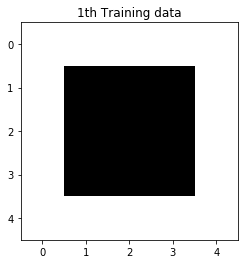

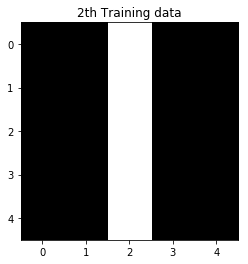

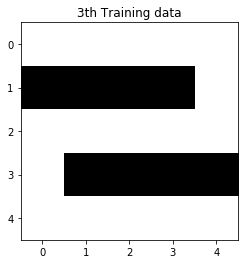

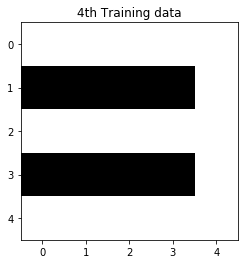

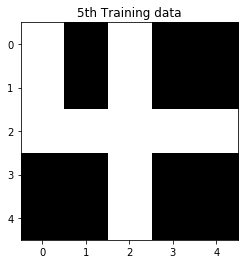

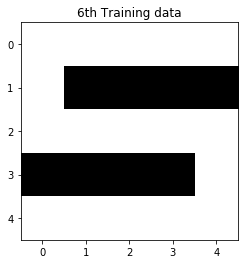

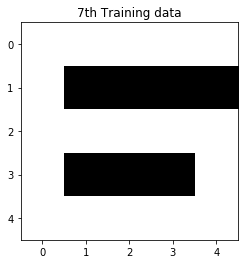

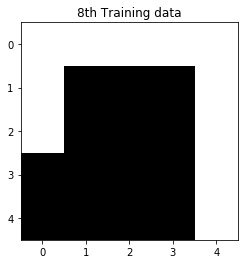

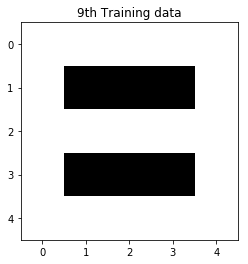

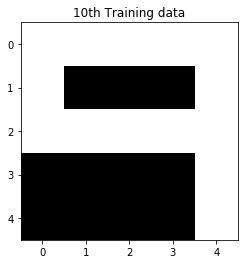

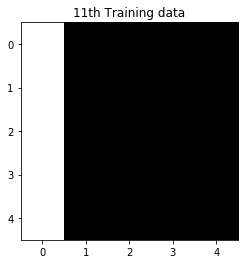

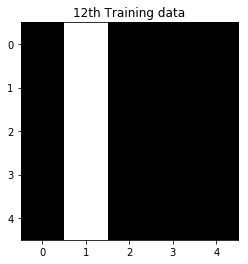

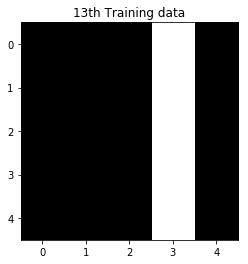

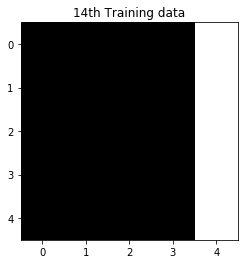

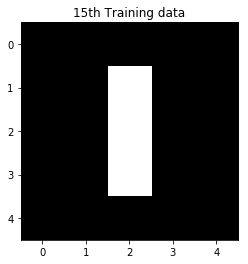

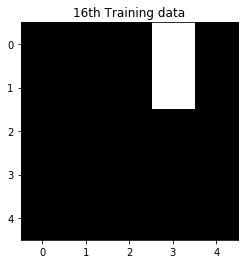

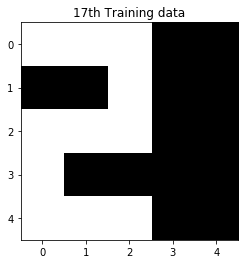

In [16]:
from PIL import Image

A = Image.new("L", (5, 5), color="black")

for i in range(len(x_data)):
    A.putdata(x_data[i])
    plt.title(str(i+1) +  "th Training data")
    plt.imshow(A, cmap="gray")
    plt.show(A)

2.2.2. 데이터 전처리_Test set - array 시각화(이미지)

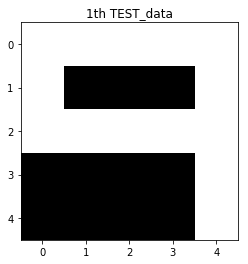

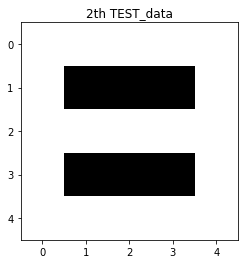

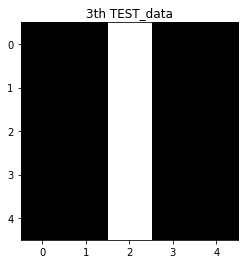

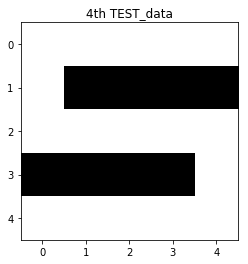

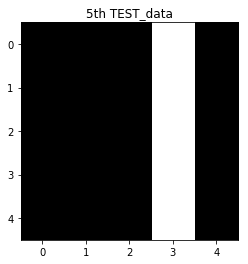

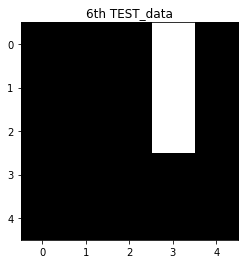

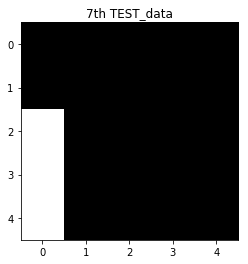

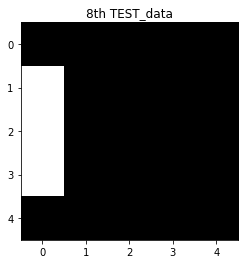

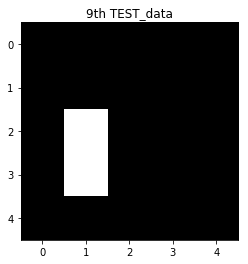

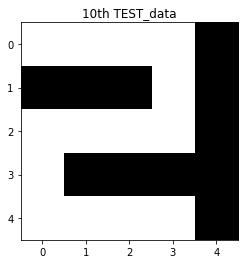

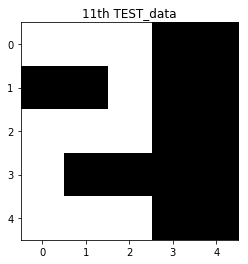

In [17]:
for i in range(len(test_data)):
    A.putdata(test_data[i])
    plt.title(str(i+1) +  "th TEST_data")
    plt.imshow(A, cmap="gray")
    plt.show(A)

2.3. 데이터 전처리 - One_hot Encoding & Reshape

In [18]:
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("One_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

#print("Reshape", Y_one_hot)

#print('re ', x_data, '\n', y_data, '\n', test_data)
#print(X, Y)

One_hot Tensor("one_hot:0", shape=(?, 17, 17), dtype=float32)


3.1. Training - Hyperparameter(Learning rate & iteration) 설정

In [19]:
#Hyperparameter
learning_rate = 0.001
iteration = 10000
batch_size = 5

3.2. Training - Layer 설정(3-Layer(25-20-10) & 3-Relu )

In [20]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [11]:
#tf.reset_default_graph() 

In [21]:
with tf.name_scope("Layer1") as scope:
    W1 = tf.Variable(tf.random_normal([3, 3, 1, 10], stddev=0.01), name='Weight1')
    b1 = tf.Variable(tf.random_normal([10]), name='Bias1')
    L1 = tf.nn.relu(conv2d(X_img, W1) + b1)
    L1 = max_pool_2x2(L1)
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
    
    W1_hist = tf.summary.histogram("Weight1", W1)
    b1_hist = tf.summary.histogram("Bias1", b1)
    L1_hist = tf.summary.histogram("Layer1", L1)

In [23]:
with tf.name_scope("Layer2") as scope:
    W2 = tf.Variable(tf.random_normal([3, 3, 10, 10], stddev=0.01), name='Weight2')
    b2 = tf.Variable(tf.random_normal([10]), name='Bias2')
    L2 = tf.nn.relu(conv2d(L1, W2) + b2)
    L2 = max_pool_2x2(L2)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
    L2 = tf.reshape(L2, [-1, 10 * 4 * 4])
    
    W2_hist = tf.summary.histogram("Weight2", W2)
    b2_hist = tf.summary.histogram("Bias2", b2)
    L2_hist = tf.summary.histogram("Layer2", L2)

In [24]:
with tf.name_scope("Layer3") as scope:
    W3 = tf.get_variable(
                     name="Weight3",
                     shape=[10 * 4 * 4, 15],
                     initializer=tf.contrib.layers.xavier_initializer()
                    )
    b3 = tf.Variable(tf.random_normal([15]), name='Bias3')
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
    
    W3_hist = tf.summary.histogram("Weight3", W3)
    b3_hist = tf.summary.histogram("Biase3", b3)
    L3_hist = tf.summary.histogram("Layer3", L3)

In [25]:
with tf.name_scope("Layer4") as scope:
    W4 = tf.get_variable(
                     name="Weight4", 
                     shape=[15, 17],
                     initializer=tf.contrib.layers.xavier_initializer()
                    )
    b4 = tf.Variable(tf.random_normal([17]), name='Bias4')
    hypothesis = tf.matmul(L3, W4) + b4
    
    W4_hist = tf.summary.histogram("Weight4", W3)
    b4_hist = tf.summary.histogram("Biase4", b3)
    L4_hist = tf.summary.histogram("Layer4", L3)

In [ ]:
# W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# L1 = tf.nn.relu(conv2d(X_img, W1) + b1)
# L1 = max_pool_2x2(L1)
# L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
# L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
# L2 = tf.nn.relu(L2)
# L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
#                     strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
# L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
# L3 = tf.nn.relu(L3)
# L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], 
#                     strides=[1, 2, 2, 1], padding='SAME')
# L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
# L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

# W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b4 = tf.Variable(tf.random_normal([625]))
# L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
# L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# W5 = tf.get_variable("W5", shape=[625, 10],
#                       initializer=tf.contrib.layers.xavier_initializer())
# b5 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.matmul(L4, W5) + b5

    

In [ ]:
# with tf.name_scope("layer1") as scope:
#     W1 = tf.get_variable(
#                          name = 'weight1',
#                          shape = [25, 20],
#                          initializer = tf.contrib.layers.xavier_initializer()
#                         )
#     b1 = tf.Variable(tf.random_normal([20]), name='bias1')
#     layer1 = tf.nn.relu(conv2d(X, W1) + b1)
#     layer1 = tf.nn.dropout(layer1, keep_prob = keep_prob)
    
#     w1_hist = tf.summary.histogram("weights1", W1)
#     b1_hist = tf.summary.histogram("biases1", b1)
#     layer1_hist = tf.summary.histogram("layer1", layer1)
    
# with tf.name_scope("layer2") as scope:
#     W2 = tf.get_variable(
#                          name = 'weight2',
#                          shape = [20, 10],
#                          initializer = tf.contrib.layers.xavier_initializer()
#                         )
#     b2 = tf.Variable(tf.random_normal([10]), name='bias2')
#     layer2 = tf.nn.relu(conv2d(layer1, W2) + b2)
#     layer2 = tf.nn.dropout(layer2, keep_prob = keep_prob)
    
#     w2_hist = tf.summary.histogram("weights2", W2)
#     b2_hist = tf.summary.histogram("biases2", b2)
#     layer2_hist = tf.summary.histogram("layer2", layer2)
    
# with tf.name_scope("layer3") as scope:
#     W3 = tf.get_variable(
#                          name = 'weight3',
#                          shape = [10, nb_classes],
#                          initializer = tf.contrib.layers.xavier_initializer()
#                         )
#     b3 = tf.Variable(tf.random_normal([nb_classes]), name='bias3')
#     hypothesis = tf.matmul(layer2, W3) + b3
    
#     w3_hist = tf.summary.histogram("weights2", W3)
#     b3_hist = tf.summary.histogram("biases2", b3)
#     hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)
    
# print("Hypothesis : {} ".format(hypothesis))

3.3. Training - Cost Fuction 설정 : Softmax-Cross_Entropy

In [26]:
# cost/loss function
with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y_one_hot))
    cost_summ = tf.summary.scalar("cost", cost)
print("Cost: {} ".format(cost))

Cost: Tensor("cost/Mean:0", shape=(), dtype=float32) 


3.4. Training - Optimizer 설정 : Adam

In [27]:
with tf.name_scope("train") as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction  = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

3.5. Training - Run & Test(Prediction) - Training set & Test set

In [29]:
# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs
    merged_summary = tf.summary.merge_all()
    lr = str(learning_rate)
    epo = str(iteration)
    #writer = tf.summary.FileWriter("./1226_"+ str(now.minute) + str(now.second) +"iter" + epo +"/lr"+lr)
   # writer.add_graph(sess.graph)  # Show the graph
    
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

#     print(x_input)
    for step in range(iteration):
        summary, _ = sess.run([merged_summary, optimizer], feed_dict={X: x_data, Y: y_data, keep_prob: 0.7})
      #  writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data, keep_prob: 0.7})
            print("Training Step: {:5}\tLoss: {:.5f}\tAcc: {:.2%}".format(step, loss, acc))
#             print("\nLayer1 Weight: ",sess.run([W1]),
#                   "\nLayer1 Bias: ",sess.run([b1]),
#                   "\nLayer2 Weight: ",sess.run([W2]),
#                   "\nLayer2 Bias: ",sess.run([b2]),
#                   "\nLayer3 Weight: ",sess.run([W3]),
#                   "\nLayer3 Bias: ",sess.run([b3]))
            
#           print("Training Step: ", step, " Cost: ",sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data, keep_prob: 1.0})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
        
        
    print("----------------------------------------------------------------------------------")    
    print("------------------------------------TEST--SET-------------------------------------")    
    print("----------------------------------------------------------------------------------")

    pred = sess.run(prediction, feed_dict={X: test_data, keep_prob: 1.0})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, test_true.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    
    
    
#     # Accuracy report

#     h, c, a = sess.run([hypothesis, prediction, accuracy], feed_dict={X: x_data, Y: y_data})
#     print("\nHypothesis: ", h, "\nPrediction: ", c, "\nAccuracy: ", a)
#     print('\n---TEST---')
#     t = sess.run([prediction],feed_dict={X: test_data})
#     print(t)

InvalidArgumentError: Input to reshape is a tensor with 680 values, but the requested shape requires a multiple of 128
	 [[Node: Layer2/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](Layer2/dropout/mul, Layer2/Reshape/shape)]]

Caused by op 'Layer2/Reshape', defined at:
  File "C:\Users\multi\Anaconda3\envs\py35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-13eb726694d8>", line 7, in <module>
    L2 = tf.reshape(L2, [-1, 8 * 4 * 4])
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2451, in reshape
    name=name)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\multi\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 680 values, but the requested shape requires a multiple of 128
	 [[Node: Layer2/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](Layer2/dropout/mul, Layer2/Reshape/shape)]]
